<a href="https://colab.research.google.com/github/prasann25/colab/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print (tf.__version__)

2.5.0


##Creating data to view and fit

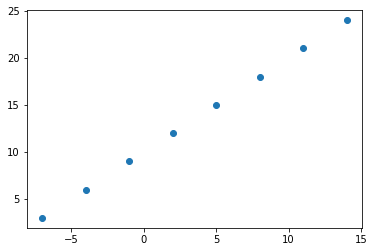

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y  = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y)


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])

house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors

X= tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

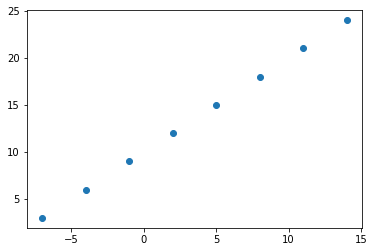

In [10]:
plt.scatter(X, y)

## Steps in modeling with Tensorflow

1. **Creating a model**- define input and output layers , as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42);

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae - mean absoulte error
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=5)



Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
#Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [14]:
y_pred + 11

array([[23.71602]], dtype=float32)

##Improving our Model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units( all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data(give the model more examples to learn from )


In [15]:
#Let's rebuild our model

# 1. Create the model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model.
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 223ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3m

In [16]:
# Remind ourselves of data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
#Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [18]:
#Let's change one more thing to the above tensor flow  

#1. Create a model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([  
   tf.keras.layers.Dense(50, activation=None), 
   tf.keras.layers.Dense(1)  
                           
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
              #Adjusting the learnig rate, is the best fix for our regression mode.=l
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
              )

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 287ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

In [19]:
#Remind of our input data once again
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Let's see if there are further improvements ~closed to 27 , the true out
model.predict([17.0])

#Looks like out model is overfitting and so even loss is less , it wont predict new inputs correctly.

array([[26.583801]], dtype=float32)

## Evaluating the model

In practice, a typical workflow yo'll go through when building neural network is :

```
Build a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluations.. there are 3 words you should memorize :

> "Visualize, visualize, visualize"

It's a good idea to visualize :
* the data - what data are we working with ? What does it look like?
* the model itself - what does our model look like ?
* the training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?


In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

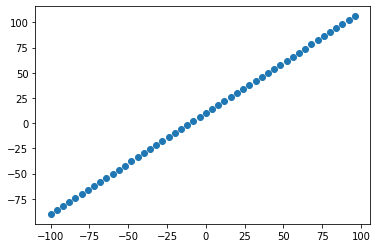

In [23]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data available.


In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 (80% of total data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples(20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets.. let's visualize it again!

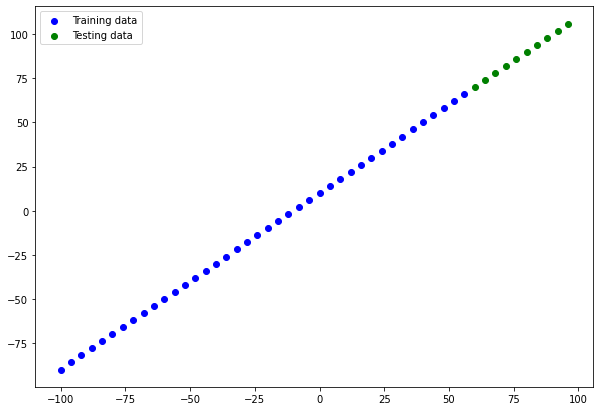

In [26]:
plt.figure(figsize=(10, 7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")
#Show a legend
plt.legend()

In [27]:
# Let's have a look at how to build a neural network for our data.

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
  ])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit a model
#model.fit(X_train, y_train, epochs=100)



### Visualizing the model

In [28]:
#Uncomment this
#model.summary()

In [29]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [57]:
#Let's create a model which builds automatically by defining the input_shape agruments in the first layer.
tf.random.set_seed(42)

#1. Create a model(same as above)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape= [1], name="input_layer"),
     tf.keras.layers.Dense(1, name="output_layer")                  
], name="model_1")

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [58]:
#Show the layers it contains, 
#Dense  - fully connected layer
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.build

* Trainable paramters - these are parameters(patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).


**Resources** : For a more in-depth overview of the trainable parameters within a layer, checkout MIT's introduction to deep learning. [https://www.youtube.com/watch?v=5tvmMX8r_OM](https://www.youtube.com/watch?v=5tvmMX8r_OM)

**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total trainable) hy calling `model.summary`.

In [59]:
#Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
#Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


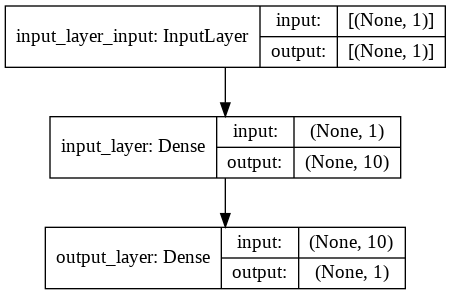

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test' or `y_true'  versus `y_pred` (ground truth versus your model's predictions).

In [61]:
# Make some predictions
y_pred = model.predict(X_test)

y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [52]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** : If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [53]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = y_pred
                     ) :
      """
      Plots training data, test data and compare predictions to ground truth labels.
      """
      plt.figure(figsize=(10, 7))
      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", label="Training data")
      #Plot testing data in green
      plt.scatter(test_data, test_labels, c="g", label="Testing data")
      #Plot model's predictions
      plt.scatter(test_data, predictions, c="r", label="Preditions")
      # Show the legend
      plt.legend();
                    

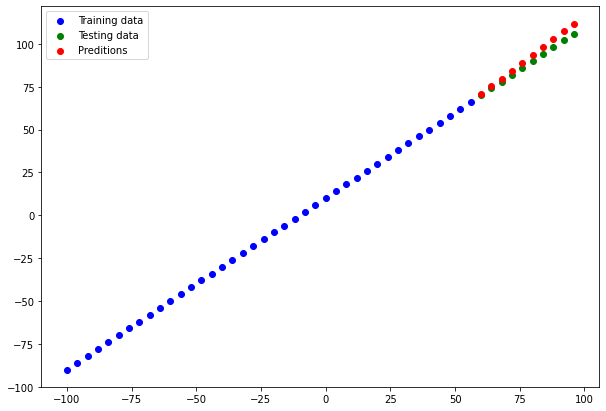

In [62]:
plot_predictions(train_data=X_train, 
                 train_labels = y_train,
                 test_data = X_test, 
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics :
* MAE - mean absolute error, "on average , how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [64]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)
#Return loss & metrics value  (loss = tf.keras.losses.mae, metrics=["mae"])

1/1 [==============================] - 0s 16ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [84]:
# Calculate the mean absolute error (mae)

mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [86]:
tf.constant(y_pred)

InvalidArgumentError: ignored

In [88]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [87]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

In [90]:
# Calculate mean absolute error

mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.squeeze(y_pred),
    )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [91]:
# Calculate mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>